In [15]:
import json
from metric import Metric
import os
from collections import defaultdict
import numpy as np

In [2]:
metric = Metric(None)
result = json.load(open('glm_result_company.json'))
input_path = '/data/lyt/exp/single/company'
topk = 4
with open('match_idx_company.json','rb') as f:
    match_idx_list = json.load(f)
train_dataset = json.load(open(os.path.join(input_path,'train.json')))

In [3]:
pred_str_list = [res['pred'].split('<stop>')[0].strip().split(' <ans> ') if '<stop>' in res['pred'] else [] for res in result ]
tgt_str_list = [res['answers'] for res in result]
with open('glm_result_company.json','w') as f:
    for unit,pred,match_idx in zip(result,pred_str_list,match_idx_list):
        unit['pred_list'] = pred
        unit.update(metric.str_metric([pred],[unit['answers']]))
        unit['cluster_acc'] = sum([int(train_dataset[idx]['relation'] == unit['relation']) for idx in match_idx[:topk]])/topk

    json.dump(result,f,indent=4,ensure_ascii=False)

In [4]:
metric.str_metric(pred_str_list,tgt_str_list)


{'em_acc_with_penalty': 0.2078852580540588,
 'char_f1_with_penalty': 0.3690120950600675}

[[1.         0.25768225]
 [0.25768225 1.        ]]


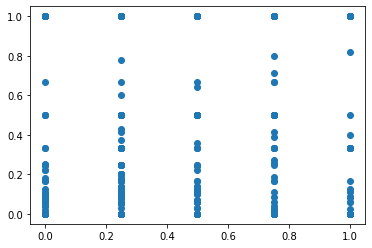

In [16]:
import matplotlib.pyplot as plt
plt.scatter([unit['cluster_acc'] for unit in result],[unit['em_acc_with_penalty'] for unit in result])
print(np.corrcoef([unit['cluster_acc'] for unit in result],[unit['em_acc_with_penalty'] for unit in result]))

[[1.       0.192867]
 [0.192867 1.      ]]


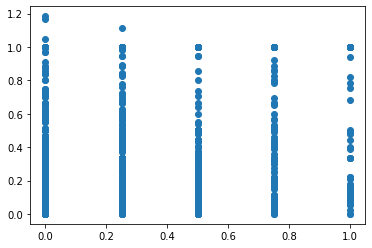

In [17]:
import matplotlib.pyplot as plt
plt.scatter([unit['cluster_acc'] for unit in result],[unit['char_f1_with_penalty'] for unit in result])
print(np.corrcoef([unit['cluster_acc'] for unit in result],[unit['char_f1_with_penalty'] for unit in result]))

In [7]:

rel2acc = defaultdict(list)
for unit in result:
    rel2acc[unit['relation']].append(unit['em_acc_with_penalty'])
rel2acc_ave = {k:np.mean(v) for k,v in rel2acc.items()}

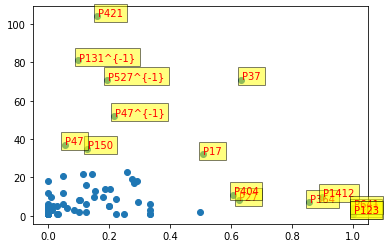

In [14]:
import matplotlib.pyplot as plt
plt.scatter([np.mean(v) for _,v in rel2acc.items()],[len(v) for _,v in rel2acc.items()])
for k,v in rel2acc.items():
    if np.mean(v) > 0.5 or len(v) > 30:
        plt.text(x=np.mean(v)+0.003,y=len(v)+0.3,s=k, 
                fontdict=dict(color='red',size=10),
                bbox=dict(facecolor='yellow',alpha=0.5))